# Analysing Sentiment without Location

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
df = pd.read_csv('../Data/sentiments_nogeo.csv')

In [4]:
df.head(3)

,Unnamed: 0,id,date,content,coordinates,place,user,content_clean,polarity,subjectivity
0,0,1394326695260393473,2021-05-17 16:19:24+00:00,"It was a beautiful visit to Coton Manor, in No...",NaN,NaN,"{'username': 'fransherbourne', 'displayname': ...","beauti visit coton manor, northamptonshir yest...",0.100000,1.000000
1,1,1394326567174672391,2021-05-17 16:18:53+00:00,A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\...,NaN,NaN,"{'username': 'Jean_Is_fed_up', 'displayname': ...",u.s. map heat 1991 2020. global warm real thin...,0.227273,0.400909
2,2,1394326500804120581,2021-05-17 16:18:37+00:00,#HedgeAZ\nN is for NEW hedges! \nSo much to sa...,NaN,NaN,"{'username': 'FavColour_Green', 'displayname':...",#hedgeaz n new hedges! much say– possibl anoth...,0.361364,0.401818


In [24]:
#extracting hashtags
df['hashtags'] = df['content'].str.findall(r'\#(\w*)').apply(', '.join)

In [25]:
df.head(3)

,Unnamed: 0,id,date,content,coordinates,place,user,content_clean,polarity,subjectivity,hashtags
0,0,1394326695260393473,2021-05-17 16:19:24+00:00,"It was a beautiful visit to Coton Manor, in No...",NaN,NaN,"{'username': 'fransherbourne', 'displayname': ...","beauti visit coton manor, northamptonshir yest...",0.100000,1.000000,
1,1,1394326567174672391,2021-05-17 16:18:53+00:00,A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\...,NaN,NaN,"{'username': 'Jean_Is_fed_up', 'displayname': ...",u.s. map heat 1991 2020. global warm real thin...,0.227273,0.400909,"DemVoice1, wtpEARTH, wtpBLUE, wtpEDU, ONEV1"
2,2,1394326500804120581,2021-05-17 16:18:37+00:00,#HedgeAZ\nN is for NEW hedges! \nSo much to sa...,NaN,NaN,"{'username': 'FavColour_Green', 'displayname':...",#hedgeaz n new hedges! much say– possibl anoth...,0.361364,0.401818,HedgeAZ


In [63]:
#most popular hashtags
hashtags_popular = df.content.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)
#most popular mentions
mentions_popular = df.content.str.extractall(r'\@(\w*)')[0].value_counts().nlargest(70)

In [131]:
def generate_wordcloud(x):
    word_cloud = WordCloud(width=1000,height=1000, random_state=21, max_font_size=200, colormap='BuGn', background_color=
                      'white').generate_from_frequencies(x)
    plt.figure(figsize=(10,9),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

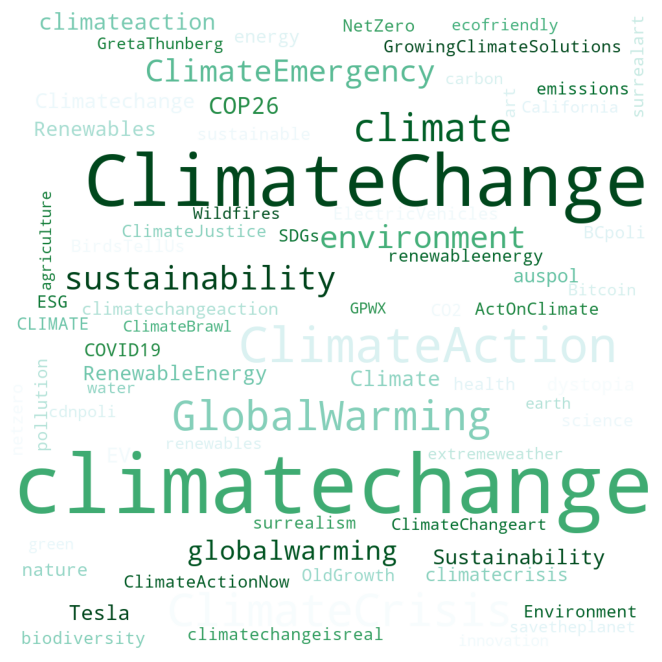

In [132]:
generate_wordcloud(hashtags_popular)

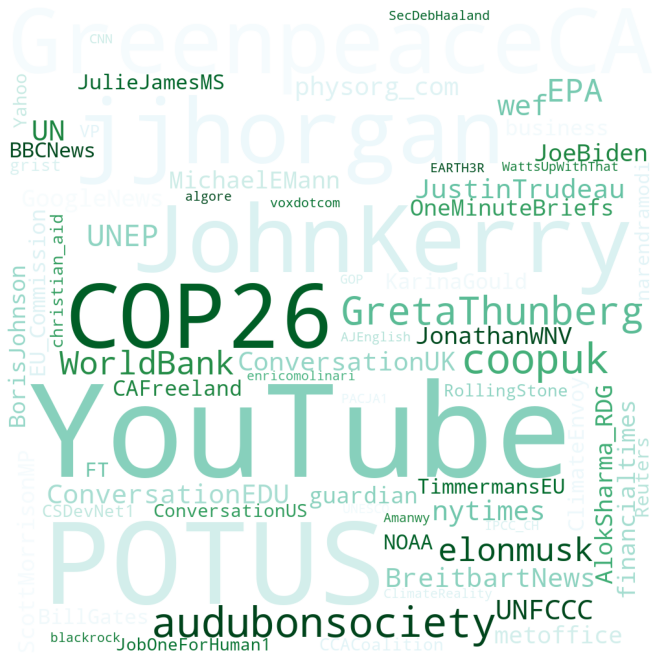

In [133]:
generate_wordcloud(mentions_popular)

**Most common words**

In [126]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

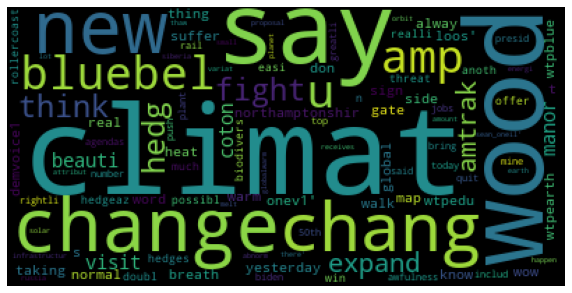

In [130]:
text = df['content_clean'].values 

wordcloud = WordCloud().generate(str(text))

plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()